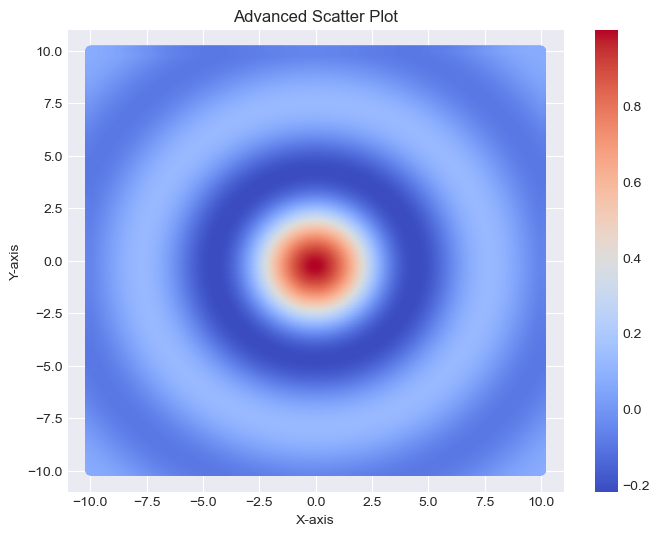

In [6]:
#1

import numpy as np
import matplotlib.pyplot as plt

# Create x and y arrays
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

# Function to calculate z
def z_func(x, y):
    r = np.sqrt(x**2 + y**2)
    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        z = np.sin(r) / r
        z[r == 0] = 1  # Define sin(0)/0 as 1
    return z

# Calculate z using meshgrid
X, Y = np.meshgrid(x, y)
Z = z_func(X, Y)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, c=Z, cmap='coolwarm')
plt.colorbar()  # Add a colorbar to the plot
plt.title('Advanced Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.savefig('advanced_scatter_plot.png', dpi=300)  # Save the figure in the current directory
plt.show()


In [7]:
#2

import pandas as pd

# Load the Brexit data from the provided CSV file
file_path = 'C:/Users/hkesa/Downloads/brexit.csv'
brexit_data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure and identify the rows to be cleaned
brexit_data.head()


,"Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?",Unnamed: 1,Unnamed: 2
0,Source: NatCen Social Research,NaN,NaN
1,NaN,NaN,NaN
2,Date,% responding right,% responding wrong
3,02/08/16,46,42
4,09/08/16,45,44


In [8]:
# Drop the first two rows and reset column names using the third row
brexit_data_cleaned = brexit_data.drop([0, 1, 2]).reset_index(drop=True)
brexit_data_cleaned.columns = ['Date', 'Right', 'Wrong']

# Convert 'Date' to datetime format
brexit_data_cleaned['Date'] = pd.to_datetime(brexit_data_cleaned['Date'], errors='coerce')

# Convert 'Right' and 'Wrong' columns to numeric
brexit_data_cleaned['Right'] = pd.to_numeric(brexit_data_cleaned['Right'], errors='coerce')
brexit_data_cleaned['Wrong'] = pd.to_numeric(brexit_data_cleaned['Wrong'], errors='coerce')

# Drop any rows with NaN values that may have resulted from conversion errors
brexit_data_cleaned.dropna(inplace=True)

# Display the cleaned data
brexit_data_cleaned.head()


C:\Users\hkesa\AppData\Local\Temp\ipykernel_8664\3544902311.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brexit_data_cleaned['Date'] = pd.to_datetime(brexit_data_cleaned['Date'], errors='coerce')


,Date,Right,Wrong
0,2016-02-08,46,42
1,2016-09-08,45,44
2,2016-08-17,46,43
3,2016-08-23,45,43
4,2016-08-31,47,44


C:\Users\hkesa\AppData\Local\Temp\ipykernel_8664\1348856415.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


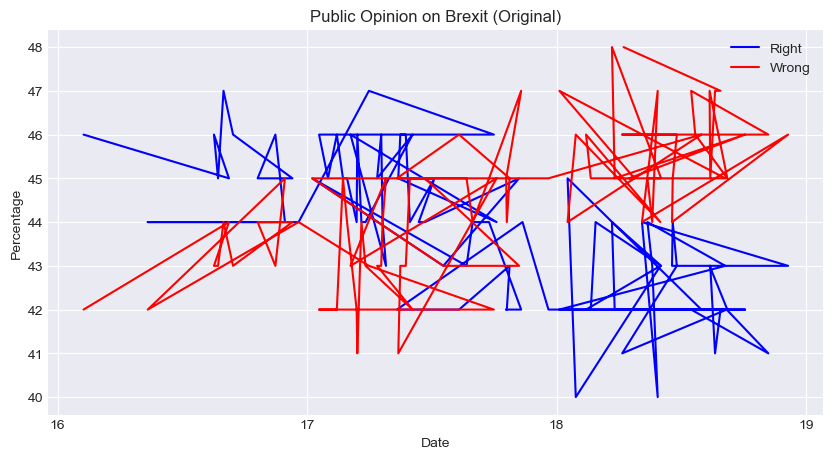

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Set plot size and style
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-darkgrid')

# Plot the data
plt.plot(brexit_data_cleaned['Date'], brexit_data_cleaned['Right'], label='Right', color='blue')
plt.plot(brexit_data_cleaned['Date'], brexit_data_cleaned['Wrong'], label='Wrong', color='red')

# Formatting the x-axis as date
date_form = DateFormatter("%y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Adding title and labels
plt.title('Public Opinion on Brexit (Original)')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()

# Show the plot
plt.show()


C:\Users\hkesa\AppData\Local\Temp\ipykernel_8664\848879959.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<Figure size 1000x500 with 0 Axes>

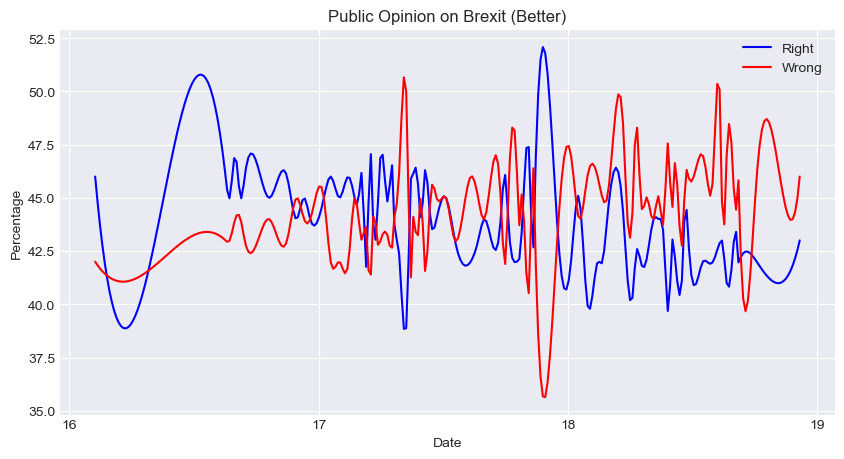

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
from scipy.interpolate import make_interp_spline

# Set plot size and style
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-darkgrid')

# Function to smooth the lines
def smooth_dates(X, Y):
    date_num = mdates.date2num(X)  # Convert dates to numerical format for smoothing
    spline = make_interp_spline(date_num, Y, k=3)  # Create spline of order 3
    smoothed_dates = np.linspace(date_num.min(), date_num.max(), 300)  # 300 points for smoothness
    smoothed_values = spline(smoothed_dates)
    return mdates.num2date(smoothed_dates), smoothed_values

# Sort the data by date to ensure it is in increasing order
brexit_data_cleaned.sort_values('Date', inplace=True)

# Attempt to smooth and plot the data again
dates_smooth, rights_smooth = smooth_dates(brexit_data_cleaned['Date'], brexit_data_cleaned['Right'])
_, wrongs_smooth = smooth_dates(brexit_data_cleaned['Date'], brexit_data_cleaned['Wrong'])

# Plot the smoothed data
plt.figure(figsize=(10, 5))
plt.plot(dates_smooth, rights_smooth, label='Right', color='blue')
plt.plot(dates_smooth, wrongs_smooth, label='Wrong', color='red')

# Formatting the x-axis as date
date_form = DateFormatter("%y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Adding title and labels
plt.title('Public Opinion on Brexit (Better)')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Comparative Assessment of Visualizations:
#  While the original graph provides a direct view of data through basic line charts, it struggles to highlight underlying trends effectively. In contrast, the improved graph utilizes smooth lines and a consistent color scheme, enhancing both the readability and aesthetic appeal of the data presentation. This approach allows for an easier interpretation of the temporal changes in public sentiment regarding Brexit, making the improved visualization a more effective tool for communicating complex time series data.
